Net stresses may be split up into a resistive and lithostatic component via $\sigma_{xx} = R_{xx} - \rho_ig(s - z)$. At a terminal cliff with water up to $z = w$, a balance of forces requires that

$$\sigma_{xx} = \begin{cases}0 & z > w \\
-\rho_w(w - z) & 0 \leq z \leq w
\end{cases}$$

i.e., air pressure does not oppose flow, but water pressure does. This provides an expression for $R_{xx}$: 

$$R_{xx} = \rho_ig(s - z) + \begin{cases}0 & z > w \\
-\rho_w(w - z) & 0 \leq z \leq w
\end{cases}$$

from which it can be found (by depth-averaging) that 

$$\overline{R}_{xx} = \frac{1}{2}\rho_igH\left(1 - \frac{\rho_w}{\rho_i}\frac{w^2}{H^2}\right)$$

which is Equation 10 (and this equation is important in evaluating both the Nye and Adjusted crevasse depths in the paper). It is very clear that $R_{xx} \neq \overline{R}_{xx}$ here. For now we will assume that there is no basal resistance, and also that crevasses only propagate from the surface, to a depth of $d$.

## Nye Crevasses

We get the Nye solution by finding the depth at which $\sigma_{xx}$ attains a zero value. Notice that this is equivalent to finding the depth $d$ at which $R_{xx} - \rho_igd = 0$, or, in other words, solving $d = \frac{R_{xx}}{\rho_ig}$. A key problem with the paper is that - even in their Nye solution - they do not solve this problem. Instead, they solve $d = -\frac{\overline{R}_{xx}}{\rho_i g}$ (note the depth-average). This provides the solution

$$d = \frac{1}{2}H\left(1 - \frac{\rho_w}{\rho_i}\frac{w^2}{H^2}\right).$$

In a general setting, it may sometimes be appropriate to approximate $R_{xx} = \overline{R}_{xx}$ (for example, in an isothermal ice shelf or ice streem, where there are no density, temperature, or fabric changes with depth). However, the authors explicitly formulate their stress balance in terms of the frontal cliff. Therefore, we know from above that $R_{xx}$ in fact varies linearly with $z$. 

Maybe even more to the point, because the authors' construction of $\overline{R}_{xx}$ relies on the cliff boundary identity

$$\sigma_{xx} = \begin{cases}0 & z > w \\
-\rho_w(w - z) & 0 \leq z \leq w
\end{cases}$$

the question "at which depth does $\sigma_{xx}$ equal zero?" has an immediate answer - everywhere above the waterline! In other words, the Nye criterion breaks at an ice cliff. It's crazy to try to avoid this by depth-integrating!

Anyway here is what some solutions look like:

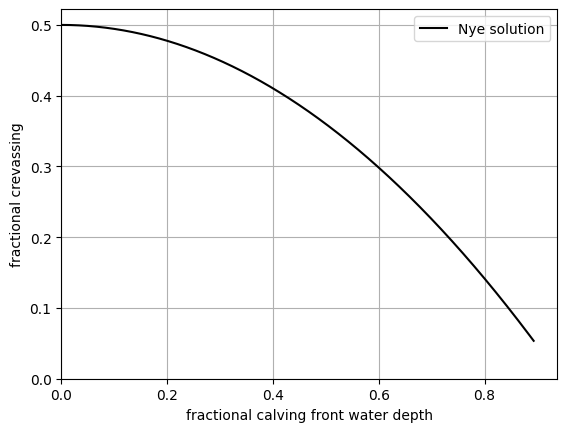

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ρ_i, ρ_w, g = 917, 1027, 9.81
H = 500
w = np.arange(0, ρ_i/ρ_w*H, 0.01)

d_nye = 1/2*H*(1 -  ρ_w*w**2/(ρ_i*H**2))

plt.figure()
plt.plot(w/H, d_nye/H, color = 'k', label = 'Nye solution')
plt.xlabel('fractional calving front water depth')
plt.ylabel('fractional crevassing')
plt.xlim(0,)
plt.ylim(0,)
plt.legend()
plt.grid()

Next we will construct the modified solution. With net stress $\sigma_{xx} = R_{xx} - \rho_ig(s - z)$ and adjusted net stress $\sigma'_{xx} = R'_{xx} - \rho_ig(s - z)$, the equivalence of the depth integrals requires that 

$$H\overline{R}_{xx} - \rho_ig\int_b^s(s - z) = H\overline{R'}_{xx} - \rho_ig\int_{b}^{s - d}(s - z)$$

so that 

$$(H - d)\overline{R'}_{xx} = H\overline{R}_{xx} - \frac{1}{2}\rho_igd^2,$$

(e.g., see Eq. 12 with our simplifications in place) where the crevasse depth $d$ satisfies 

$$\overline{R'}_{xx} = \rho_igd.$$

Setting $d^* = \frac{d}{H}$ and simplifying, the fractional crevassing must satisfy the quadratic equation below.

$$d^{*2} - 2d^* + \left(1 - \frac{\rho_w}{\rho_i}\frac{w^2}{H^2}\right) = 0$$

By the quadratic formula, this provides a general solution of 

$$d^* = 1 \pm \left|\frac{w}{H}\right|\sqrt{\frac{\rho_w}{\rho_i}}$$

This result is equivalent to Equation 17 (with zero tensile strength and basal resistance), but with both real solutions provided. **Notice that the larger solution is always greater than unity, and so the authors must somehow justify its exclusion to avoid full-thickness surface crevasses everywhere - especially since this is their exact calving criterion!**

In [2]:
A = 1
B = -2
C = (1 - ρ_w/ρ_i*(w**2/H**2))

sol_1 = (-B + np.sqrt(B**2 - 4*A*C))/(2*A)
sol_2 = (-B - np.sqrt(B**2 - 4*A*C))/(2*A)

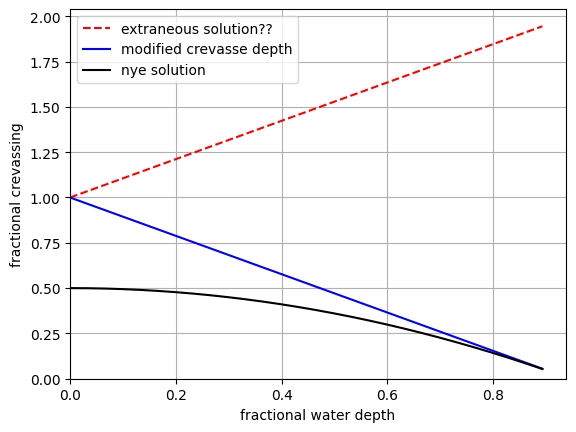

In [3]:
plt.figure()
plt.plot(w/H, sol_1, color = 'red', linestyle = 'dashed', label = 'extraneous solution??')
plt.plot(w/H, sol_2, color = 'blue', label = 'modified crevasse depth')
plt.plot(w/H, d_nye/H, color = 'k', label = 'nye solution')
plt.xlim(0,)
plt.ylim(0,)
plt.grid()
plt.xlabel('fractional water depth')
plt.ylabel('fractional crevassing')
plt.legend()

If we add a nonzero tensile strength, then we modify the crevasse depth law so that $R'_{xx} = \rho_igd + \sigma_{max}$. In this case, 

$$\rho_igd^2 -2\left(\rho_igH - \sigma_{max}\right)d + \rho_igH^2\left(1 - \frac{\rho_w}{\rho_i}\frac{w^2}{H^2} - 2\sigma_{max}\right) = 0,$$

which nondimensionalizes to 

$$d^{*2} -2\left(1 - \frac{\sigma_{max}}{\rho_igH}\right)d^* +  \left(1 - \frac{\rho_w}{\rho_i}\frac{w^2}{H^2} - 2\frac{\sigma_{max}}{\rho_igH}\right) = 0$$

As a basic check, this clearly reduces to the above case with $\sigma_{max} = 0$. This has general solution

$$d = (1 - \tilde{\sigma}) \pm \sqrt{\tilde{\sigma}^2 + \frac{\rho_w}{\rho_i}\frac{w^2}{H^2}}$$
where substitutions are intorduced as in the paper. 

In [4]:
H = 500
w = np.arange(0, ρ_i/ρ_w*H, 0.01)

σ_max = 150000

A = 1
B = -2*(1 - σ_max/(ρ_i*g*H))
C = (1 - ρ_w/ρ_i*(w**2/H**2) - 2*σ_max/(ρ_i*g*H))

sol_1 = 1 - σ_max/(ρ_i*g*H) + np.sqrt(σ_max**2/(ρ_i*g*H)**2 + ρ_w/ρ_i*w**2/H**2)
sol_2 = 1 - σ_max/(ρ_i*g*H) - np.sqrt(σ_max**2/(ρ_i*g*H)**2 + ρ_w/ρ_i*w**2/H**2)
d_nye = 1/2*H*(1 -  ρ_w*w**2/(ρ_i*H**2))

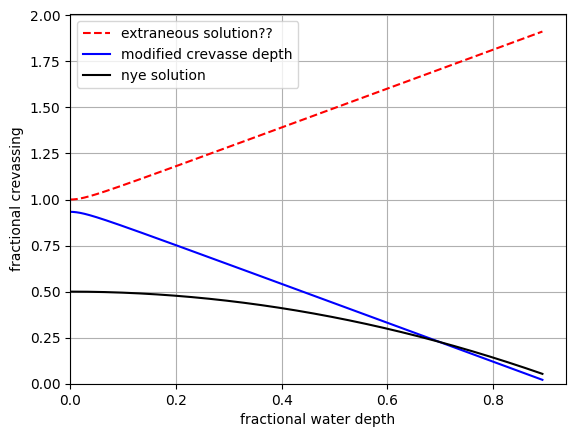

In [5]:
plt.figure()
plt.plot(w/H, sol_1, color = 'red', linestyle = 'dashed', label = 'extraneous solution??')
plt.plot(w/H, sol_2, color = 'blue', label = 'modified crevasse depth')
plt.plot(w/H, d_nye/H, color = 'k', label = 'nye solution')
plt.xlabel('fractional water depth')
plt.ylabel('fractional crevassing')
plt.xlim(0,)
plt.ylim(0,)
plt.grid()
plt.legend()